### Financial Engineering 
# Module Assignment - Part 1

<hr>

## Table of Contents
1. [Question 1](#q1)
2. [Question 2](#q2)
3. [Question 3](#q3)

In [1]:
# importing dependencies 
from scipy.stats import norm 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import fintech.prices as pr # for prices
import fintech.dataio as dtio # for data input & output
import fintech.finmodels as fmd # for financial models 
import fintech.constants as const # for constant values 
from IPython.display import display
from collections import OrderedDict

%matplotlib inline

<a id="q1"></a>
## Question #1

The objective of this question is to analyse the data for different instruments, based on last year’s
data, and provide your opinion in terms of their respective risk and return. 

<b>(i)</b> Download daily closing price data for S&P 500, FTSE 100 and Gold (SPDR) for the years 2014 to 2017. 

In [2]:
# downloading closing prices for S&P500, FTSE100 and GOLD(SPDR)
data_path = "data/part_1/"

# defining tickers and filenames (filename,ticker)
sp_ticker = ("S&P500", "^GSPC")
ftse_ticker = ("FTSE100", "^FTSE?P=FTSE")
gld_ticker = ("GOLD", "GLD")

# date format '%Y-%m-%d' from 2014 to 2017
start_date = "2014-01-01"
end_date = "2018-01-01"

# download prices for tickers if they are not found in data path 
dtio.df2csv(data_path, sp_ticker[0], pr.download_prices, sp_ticker[1], start_date, end_date) # S&P500
dtio.df2csv(data_path, ftse_ticker[0], pr.download_prices, ftse_ticker[1], start_date, end_date) # FTSE100
dtio.df2csv(data_path, gld_ticker[0], pr.download_prices, gld_ticker[1], start_date, end_date) # GOLD(SPDR)

# importing prices from the specified tickers; from csv to pandas dataframe
# use OrderedDictionary to hold references to all prices downloaded
prices_dict = OrderedDict()
prices_dict[sp_ticker[0]] = dtio.csv2df(data_path, sp_ticker[0], const.COL_DATE)
prices_dict[ftse_ticker[0]] = dtio.csv2df(data_path, ftse_ticker[0], const.COL_DATE)
prices_dict[gld_ticker[0]] = dtio.csv2df(data_path, gld_ticker[0], const.COL_DATE)

# iterate in dictionary and show downloaded prices 
print("\n")
for key in prices_dict: 
    print("Ticker: {0} , Size: {1}".format(key , prices_dict[key].shape[0]))
    print(prices_dict[key].dtypes)
    display(prices_dict[key].head())
    display(prices_dict[key].tail())
    
# NOTE: from the shape print we know that FTSE has more rows some discrepancy

File already found in path specified: data/part_1/S&P500.csv.
File already found in path specified: data/part_1/FTSE100.csv.
File already found in path specified: data/part_1/GOLD.csv.


Ticker: S&P500 , Size: 1008
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-31,1842.609985,1849.439941,1842.410034,1848.359985,1848.359985,2312840000
2014-01-02,1845.859985,1845.859985,1827.739990,1831.979980,1831.979980,3080600000
2014-01-03,1833.209961,1838.239990,1829.130005,1831.369995,1831.369995,2774270000
2014-01-06,1832.310059,1837.160034,1823.729980,1826.770020,1826.770020,3294850000
2014-01-07,1828.709961,1840.099976,1828.709961,1837.880005,1837.880005,3511750000


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-22,2684.219971,2685.350098,2678.129883,2683.340088,2683.340088,2399830000
2017-12-26,2679.090088,2682.739990,2677.959961,2680.500000,2680.500000,1968780000
2017-12-27,2682.100098,2685.639893,2678.909912,2682.620117,2682.620117,2202080000
2017-12-28,2686.100098,2687.659912,2682.689941,2687.540039,2687.540039,2153330000
2017-12-29,2689.149902,2692.120117,2673.610107,2673.610107,2673.610107,2443490000


Ticker: FTSE100 , Size: 1011
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,6749.100098,6759.399902,6707.500000,6717.899902,6717.899902,459529100
2014-01-03,6717.899902,6747.299805,6699.299805,6730.700195,6730.700195,374841500
2014-01-06,6730.700195,6752.000000,6714.600098,6730.700195,6730.700195,524387000
2014-01-07,6730.700195,6768.899902,6718.100098,6755.500000,6755.500000,672375600
2014-01-08,6755.500000,6755.500000,6713.399902,6721.799805,6721.799805,720025300


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-21,7525.200195,7609.700195,7517.899902,7604.000000,7604.000000,621347000
2017-12-22,7604.000000,7614.399902,7585.500000,7592.700195,7592.700195,243831300
2017-12-27,7592.700195,7632.700195,7586.399902,7620.700195,7620.700195,458380900
2017-12-28,7620.700195,7633.600098,7609.799805,7622.899902,7622.899902,311875400
2017-12-29,7622.899902,7697.600098,7620.000000,7687.799805,7687.799805,289238900


Ticker: GOLD , Size: 1008
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-31,114.610001,117.129997,114.459999,116.120003,116.120003,12835900
2014-01-02,117.930000,118.730003,117.750000,118.000000,118.000000,7551000
2014-01-03,118.639999,119.620003,118.589996,119.290001,119.290001,5874400
2014-01-06,119.760002,120.389999,117.110001,119.500000,119.500000,10106500
2014-01-07,118.459999,118.919998,118.129997,118.820000,118.820000,6433700


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-22,120.669998,121.139999,120.570000,120.940002,120.940002,5791300
2017-12-26,121.550003,121.870003,121.510002,121.769997,121.769997,8224400
2017-12-27,122.000000,122.339996,121.879997,122.230003,122.230003,6232700
2017-12-28,122.820000,122.919998,122.559998,122.849998,122.849998,5732700
2017-12-29,123.699997,124.089996,123.459999,123.650002,123.650002,7852100


<b>(ii)</b> Why log returns are normally preferred from standard arithmetic returns?

<b>(iii)</b> Identify the first 4 distribution moments for each index/product mentioned in part <b>(i)</b>. For your calculations utilise daily log returns. In your answer describe the calculations/steps performed.

In [3]:
# decimal places
ndigits = 6

# calculate daily log returns for tickers 
# output the 4 distribution moments 
# iterate in prices dictionary
for key in prices_dict: 
    
    # print key/ticker 
    print("Key: {0}".format(key))
    
    # calculate daily log returns 
    prices_dict[key][const.COL_LOG_RETURN] = pr.log_diff(dataframe=prices_dict[key], 
                                                         column=const.COL_ADJ_CLOSE, 
                                                         shift=1)
        
    # print rows count before dropping NaN 
    print("\tRows before dropping NaN (Log Returns): {0}".format(prices_dict[key].shape[0]))
    
    # drop NaN daily log returns 
    prices_dict[key] = prices_dict[key].dropna() 
    
    # print rows count after dropping NaN 
    print("\tRows after dropping NaN (Log Returns): {0}".format(prices_dict[key].shape[0]))

    # calculate 4 distribution moments 
    dist_mean, dist_std, dist_skew, dist_kurtosis = fmd.dist_moments(prices_dict[key][const.COL_LOG_RETURN])
    
    # print 4 distribution moments
    print("\nDistribution Moments "+
          "\n\tMean (1st): {0}".format(round(dist_mean, ndigits)) +
          "\n\tSTD (2nd): {0}".format(round(dist_std, ndigits)) +
          "\n\tSkew (3rd): {0}".format(round(dist_skew, ndigits)) +
          "\n\tKurtosis (4th): {0}".format(round(dist_kurtosis, ndigits)) +
          "\n\n##########################################\n")

Key: S&P500
	Rows before dropping NaN (Log Returns): 1008
	Rows after dropping NaN (Log Returns): 1007

Distribution Moments 
	Mean (1st): 0.000367
	STD (2nd): 0.007621
	Skew (3rd): -0.409687
	Kurtosis (4th): 3.120574

##########################################

Key: FTSE100
	Rows before dropping NaN (Log Returns): 1011
	Rows after dropping NaN (Log Returns): 1010

Distribution Moments 
	Mean (1st): 0.000134
	STD (2nd): 0.008815
	Skew (3rd): -0.176003
	Kurtosis (4th): 2.722205

##########################################

Key: GOLD
	Rows before dropping NaN (Log Returns): 1008
	Rows after dropping NaN (Log Returns): 1007

Distribution Moments 
	Mean (1st): 6.2e-05
	STD (2nd): 0.008785
	Skew (3rd): 0.218914
	Kurtosis (4th): 2.279381

##########################################



<b>(iv)</b> Comment on the measured statistics from the perspective of risk and return. In your answer compare the results obtained.

<b>(v)</b> Annualize daily return (first moment) and volatility (second moment). In your scaling process assume 250 days for the year. In your answer describe the calculations/steps performed.

In [4]:
# annualizing daily returns and volatility for tickers 
# iterate in distribution moments dictionary
for key in prices_dict:
    # calculate annualized return and volatility 
    print("Annualized return and volatility for: {0}".format(key))
    annualized_return, annualized_volatility = fmd.annretvol_asset(asset_return=prices_dict[key][const.COL_LOG_RETURN],
                                                                   year_days=const.YEAR_250)
    
    # round return and volatility 
    annualized_return = round(annualized_return, 4)
    annualized_volatility = round(annualized_volatility, 4)
            
    # print annualized return and volatility 
    print("\tAnnualized Returns: {0}%".format(annualized_return) +
          "\n\tAnnualized Volatility: {0}%".format(annualized_volatility) + 
          "\n\n##########################################\n")

Annualized return and volatility for: S&P500
	Annualized Returns: 9.1641%
	Annualized Volatility: 12.0506%

##########################################

Annualized return and volatility for: FTSE100
	Annualized Returns: 3.3381%
	Annualized Volatility: 13.9372%

##########################################

Annualized return and volatility for: GOLD
	Annualized Returns: 1.5599%
	Annualized Volatility: 13.8906%

##########################################



<b>(vi)</b> By considering the last closing price at the end of 2017, and the annualized volatility from question <b>(v)</b>, what would be the price level of S&P 500 after 1 month, that according to normal probability, there is a 32% chance that the actual price will be above it. Show your workings.

In [5]:
# show what the price would be after 1 month (S&P500)
# get the last closing price for S&P500
sp_last_close = prices_dict[sp_ticker[0]].tail(1)["Adj Close"].values[0]
print("Last closing price (S&P500) for 2017: ${0} ".format(round(sp_last_close, 2)))

# get annualized volatility for S&P500
sp_annual_vol = round(fmd.annretvol_asset(prices_dict[sp_ticker[0]][const.COL_LOG_RETURN],
                                          year_days=const.YEAR_250)[1],2)

# print annualized volatility for S&P500
print("Annualized Volatility (S&P500): {0}%".format(sp_annual_vol))

# calculate price deviation for the next month 
sp_deviation = sp_last_close * (sp_annual_vol/100) * ((const.MONTH_20/const.YEAR_250) ** 0.5)

# calculate the price level/range
sp_low = round((sp_last_close - sp_deviation), 2)
sp_high = round((sp_last_close + sp_deviation), 2)
print("Price levels after one month: ${0} - ${1}".format(sp_low, sp_high))

## TODO -> ASK VINCE IF I UNDERSTOOD THIS QUESTION CORRECTLY 
# show that according to normal probability 
# there is a 32% chance that it will be above it
sp_low_zscore = ((sp_low - sp_last_close) / sp_deviation)
sp_high_zscore = ((sp_high - sp_last_close) / sp_deviation)
sp_prob_low = round(norm.cdf(x = sp_low_zscore, loc=0, scale = 1) * 100) # mean=0,std=1 
sp_prob_high = 100 - round(norm.cdf(x = sp_high_zscore, loc=0, scale = 1) * 100) # mean=0,std=1 

print("\nThe prob of the actual price being below ${0} is {1}%".format(sp_low, sp_prob_low)+ 
      "\nThe prob of the actual price being above ${0} is {1}%".format(sp_high, sp_prob_high)+
      "\nThe prob of the actual price being above or below the ranges of ${0} - ${1} is {2}%"
      .format(sp_low, sp_high, (sp_prob_low + sp_prob_high)))

Last closing price (S&P500) for 2017: $2673.61 
Annualized Volatility (S&P500): 12.05%
Price levels after one month: $2582.49 - $2764.73

The prob of the actual price being below $2582.49 is 16.0%
The prob of the actual price being above $2764.73 is 16.0%
The prob of the actual price being above or below the ranges of $2582.49 - $2764.73 is 32.0%


<b>(vii)</b> Download the Google and Amazon daily prices for the last 5 years (till 31/12/2017). By utilizing a regression model, perform the Beta-test against the S&P 500 index. Comment on your findings.

In [6]:
# defining tickers and filenames (filename,ticker)
goog_ticker = ("GOOGLE", "GOOG")
amzn_ticker = ("AMAZON", "AMZN")
spbeta_ticker = ("S&P500BETA", "^GSPC")

# date format '%Y-%m-%d' from 2013 to 2017 (5 years)
start_date = "2013-01-01"
end_date = "2017-12-31"

# download prices for tickers if they are not found in data path 
dtio.df2csv(data_path, goog_ticker[0], pr.download_prices, goog_ticker[1], start_date, end_date) # GOOGLE
dtio.df2csv(data_path, amzn_ticker[0], pr.download_prices, amzn_ticker[1], start_date, end_date) # AMAZON
dtio.df2csv(data_path, spbeta_ticker[0], pr.download_prices, spbeta_ticker[1], start_date, end_date) # S&P500

# importing prices from the specified tickers; from csv to pandas dataframe
prices_dict[goog_ticker[0]] = dtio.csv2df(data_path, goog_ticker[0], const.COL_DATE)
prices_dict[amzn_ticker[0]] = dtio.csv2df(data_path, amzn_ticker[0], const.COL_DATE)
prices_dict[spbeta_ticker[0]] = dtio.csv2df(data_path, spbeta_ticker[0], const.COL_DATE)

# pandas dataframe for all closing prices 
beta_prices = pd.DataFrame(index = prices_dict[goog_ticker[0]].index.values)

# iterate in dictionary and show downloaded prices + concat all adj closing prices
print("\n")
beta_keys = [goog_ticker[0], amzn_ticker[0], spbeta_ticker[0]]
for key in beta_keys: 
    print("Ticker: {0} , Size: {1}".format(key , prices_dict[key].shape[0]))
    
    # append closing prices for key
    beta_prices.insert(loc=beta_prices.shape[1], column=key, value=prices_dict[key][const.COL_ADJ_CLOSE])

# display head for beta prices
beta_prices = beta_prices.rename(columns = {spbeta_ticker[0] : sp_ticker[0]}) # rename column for S&P500
 
display(beta_prices.head()) # print head for closing prices
display(beta_prices.tail()) # print tail for closing prices

print("Closing Prices: Size: {0}".format(beta_prices.shape[0])) # print new closing prices size 

# compute the percentage change 
beta_prices = beta_prices.pct_change(1) # calculate percentage change 

# print rows count before dropping NaN 
print("Rows before dropping NaN: {0}".format(beta_prices.shape[0]))

# drop NaN perc change 
beta_prices =  beta_prices.dropna(axis=0) 

# print rows count after dropping NaN 
print("Rows after dropping NaN: {0}".format(beta_prices.shape[0]))

# print head and tail for closing prices
display(beta_prices.head()) 
display(beta_prices.tail()) 

File already found in path specified: data/part_1/GOOGLE.csv.
File already found in path specified: data/part_1/AMAZON.csv.
File already found in path specified: data/part_1/S&P500BETA.csv.


Ticker: GOOGLE , Size: 1260
Ticker: AMAZON , Size: 1260
Ticker: S&P500BETA , Size: 1260


,GOOGLE,AMAZON,S&P500
2012-12-31,351.404449,250.869995,1426.189941
2013-01-02,359.288177,257.309998,1462.420044
2013-01-03,359.496826,258.480011,1459.369995
2013-01-04,366.600616,259.149994,1466.469971
2013-01-07,365.001007,268.459991,1461.890015


,GOOGLE,AMAZON,S&P500
2017-12-22,1060.119995,1168.359985,2683.340088
2017-12-26,1056.739990,1176.760010,2680.500000
2017-12-27,1049.369995,1182.260010,2682.620117
2017-12-28,1048.140015,1186.099976,2687.540039
2017-12-29,1046.400024,1169.469971,2673.610107


Closing Prices: Size: 1260
Rows before dropping NaN: 1260
Rows after dropping NaN: 1259


,GOOGLE,AMAZON,S&P500
2013-01-02,0.022435,0.025671,0.025403
2013-01-03,0.000581,0.004547,-0.002086
2013-01-04,0.019760,0.002592,0.004865
2013-01-07,-0.004363,0.035925,-0.003123
2013-01-08,-0.001973,-0.007748,-0.003242


,GOOGLE,AMAZON,S&P500
2017-12-22,-0.003300,-0.005448,-0.000458
2017-12-26,-0.003188,0.007190,-0.001058
2017-12-27,-0.006974,0.004674,0.000791
2017-12-28,-0.001172,0.003248,0.001834
2017-12-29,-0.001660,-0.014021,-0.005183


GOOGLE against S&P500 Beta-test
Summary (OLS):                             OLS Regression Results                            
Dep. Variable:                 GOOGLE   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     632.9
Date:                Mon, 04 Feb 2019   Prob (F-statistic):          1.92e-113
Time:                        19:59:54   Log-Likelihood:                 3852.7
No. Observations:                1259   AIC:                            -7701.
Df Residuals:                    1257   BIC:                            -7691.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

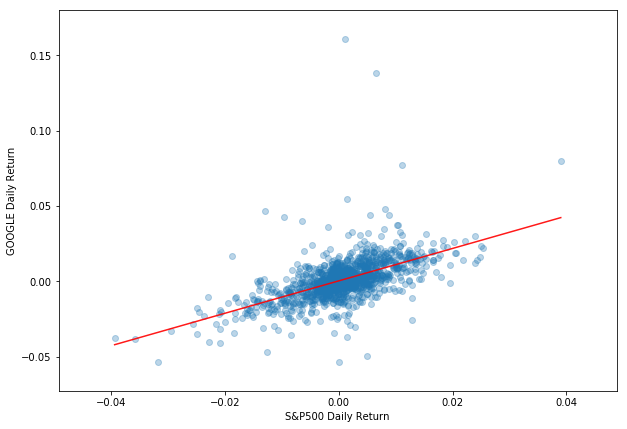

AMAZON against S&P500 Beta-test
Summary (OLS):                             OLS Regression Results                            
Dep. Variable:                 AMAZON   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     412.4
Date:                Mon, 04 Feb 2019   Prob (F-statistic):           1.60e-79
Time:                        19:59:54   Log-Likelihood:                 3428.3
No. Observations:                1259   AIC:                            -6853.
Df Residuals:                    1257   BIC:                            -6842.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

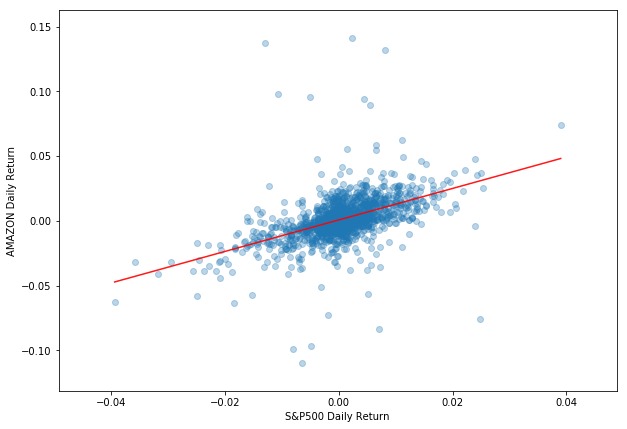

In [7]:
# now that we have the percentage changes (daily returns)
# utilise Linear Regression using OLS to perform Beta-Test 

# GOOGLE VS S&P500
fmd.beta_test_ols(x=beta_prices[sp_ticker[0]],
                  y=beta_prices[goog_ticker[0]],
                  x_label=sp_ticker[0],
                  y_label=goog_ticker[0])

# AMAZON VS S&P500
fmd.beta_test_ols(x=beta_prices[sp_ticker[0]],
                  y=beta_prices[amzn_ticker[0]],
                  x_label=sp_ticker[0],
                  y_label=amzn_ticker[0])

<a id="q2"></a>
## Question #2

Modern or mean-variance portfolio theory (MPT) is a major cornerstone of financial theory. Based on this theoretical breakthrough the Nobel Prize in Economics was awarded to its inventor, Harry Markowitz, in 1990. Using the data from Question 1, we need to investigate the right allocation across a portfolio made up of 3 investments, S&P 500, FTSE 100 and Gold (SPDR).

<b>(i)</b> In question 1, you identified the individual expected return and volatility of the 3 investments separately. Calculate the expected return and volatility of the portfolio, considering equal weight for the 3 investments.

In [8]:
# since the dates between S&P500, GOLD do not match FTSE100
# we need to align them 
sp_dates = prices_dict[sp_ticker[0]].index
ftse_dates = prices_dict[ftse_ticker[0]].index
gld_dates = prices_dict[gld_ticker[0]].index

# print date check 
print("Comparing Dates of S&P500 with FTSE100: {0}".format(sp_dates.equals(ftse_dates)))
print("Comparing Dates of S&P500 with Gold: {0}".format(sp_dates.equals(gld_dates)))

# align dates
intersect_dates = np.intersect1d(sp_dates.values, ftse_dates.values)
sp_align = prices_dict[sp_ticker[0]][prices_dict[sp_ticker[0]].index.isin(intersect_dates)][const.COL_ADJ_CLOSE]
ftse_align = prices_dict[ftse_ticker[0]][prices_dict[ftse_ticker[0]].index.isin(intersect_dates)][const.COL_ADJ_CLOSE]
gld_align = prices_dict[gld_ticker[0]][prices_dict[gld_ticker[0]].index.isin(intersect_dates)][const.COL_ADJ_CLOSE]

# print check after alignment
print("\nAfter alignment: Comparing Dates of S&P500 with FTSE100: {0}".format(sp_align.index.equals(ftse_align.index)))
print("After alignment:: Comparing Dates of S&P500 with Gold: {0}".format(sp_align.index.equals(gld_align.index)))
print("After alignment:: Comparing Dates of FTSE100 with Gold: {0}".format(ftse_align.index.equals(gld_align.index)))

# now that we aligned the dates create one dataframe with different adj close of the 3 assets
asset_returns = pd.concat([sp_align, ftse_align, gld_align], axis = 1, 
                             keys=[sp_ticker[0], ftse_ticker[0], gld_ticker[0]])

# calculate aligned log returns 
for column in asset_returns:
    asset_returns[column] = pr.log_diff(dataframe=asset_returns, 
                                        column=column, 
                                        shift=1)

# print head of aligned log returns
asset_returns = asset_returns.dropna(axis=0)
display(asset_returns.head())

# set equal weight for portfolio 
equal_weight = 1/asset_returns.shape[1]
asset_weights = np.full(3, equal_weight)

# calculate portfolio annualized expected return and volatility 
portfolio_returns, portfolio_volatility = fmd.annretvol_port(asset_returns=asset_returns,
                                                             asset_weights=asset_weights,
                                                             year_days=const.YEAR_250)

# round return and volatility 
portfolio_returns = round(portfolio_returns, 4)
portfolio_volatility = round(portfolio_volatility, 4)
            
# print results 
portfolio_stock = list(asset_returns.columns)
print("Portfolio with assets: {0}".format(portfolio_stock) +
      "\nwith respective weights of: {0}".format(asset_weights) +
      "\nhas an annualized expected return of: {0}%".format(portfolio_returns) +
      "\nhas an annualized expected volatility of: {0}%".format(portfolio_volatility))

Comparing Dates of S&P500 with FTSE100: False
Comparing Dates of S&P500 with Gold: True

After alignment: Comparing Dates of S&P500 with FTSE100: True
After alignment:: Comparing Dates of S&P500 with Gold: True
After alignment:: Comparing Dates of FTSE100 with Gold: True


,S&P500,FTSE100,GOLD
Date,,,
2014-01-06,-0.002515,0.000000,0.001759
2014-01-07,0.006063,0.003678,-0.005707
2014-01-08,-0.000212,-0.005001,-0.005909
2014-01-09,0.000348,-0.004548,0.002874
2014-01-10,0.002304,0.007237,0.015081


Portfolio with assets: ['S&P500', 'FTSE100', 'GOLD']
with respective weights of: [0.33333333 0.33333333 0.33333333]
has an annualized expected return of: 4.6109%
has an annualized expected volatility of: 8.2398%


<b>(ii)</b> Investigate different portfolio expected return and volatility by simulating different random weights of your investments (2000 simulations). Assume that all weights have to be > 0 and that the sum of all weights should be equal to 1. Create a plot showing the expected return (y-axis) and volatility (x-axis) for different/random portfolio weights.

,expected_return,expected_volatility,sharpe_ratio,weights
0,3.617292,8.603797,0.420430,"[0.18205877561639985, 0.46212908544657766, 0.3..."
1,7.018647,9.419742,0.745100,"[0.657381271833743, 0.17132260711444883, 0.171..."
2,2.630231,9.145369,0.287602,"[0.03807825678154029, 0.5678448096745716, 0.39..."
3,4.545917,8.619692,0.527387,"[0.41686469204449644, 0.012118741982948326, 0...."
4,7.207198,9.675696,0.744876,"[0.6786548843400361, 0.1731109959235988, 0.148..."


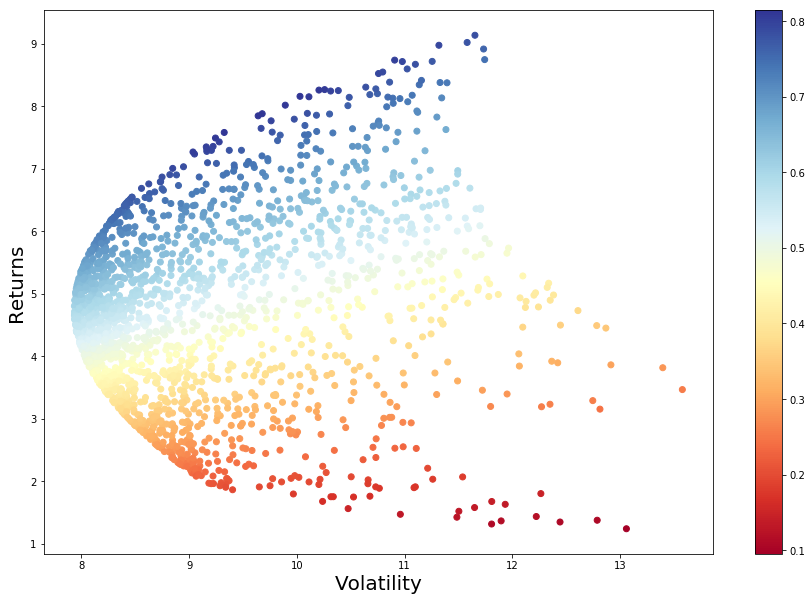

In [9]:
# apply different random weight simulations 
n_simulations = 2000
random_seed = 42

# compute simulations
random_weights_results = fmd.annretvol_port_rand(asset_returns=asset_returns,
                                                year_days=const.YEAR_250,
                                                n_simulations=n_simulations,
                                                seed=random_seed)

# display head for results 
display(random_weights_results.head())

# plot results 
plt.figure(figsize=(15,10))
plt.scatter(random_weights_results["expected_volatility"],
           random_weights_results["expected_return"],
           c=random_weights_results["sharpe_ratio"],
           cmap="RdYlBu")
plt.xlabel("Volatility",fontsize=20)
plt.ylabel("Returns",fontsize=20)
plt.colorbar()